In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

data.head(143)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
data.shape

(30, 17)

In [5]:
data.tail(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
20,90,683,5527,1351,295,17,177,488,1290,51,613,557,3.43,1,14,50,88
21,83,703,5428,1363,265,13,177,539,1344,57,635,577,3.62,4,13,41,90
22,71,613,5463,1420,236,40,120,375,1150,112,678,638,4.02,0,12,35,77
23,67,573,5420,1361,251,18,100,471,1107,69,760,698,4.41,3,10,44,90
24,63,626,5529,1374,272,37,130,387,1274,88,809,749,4.69,1,7,35,117
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [6]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [7]:
data.columns.size

17

In [8]:
data.index

RangeIndex(start=0, stop=30, step=1)

In [9]:
data.iloc[1:23]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [11]:
data.rename(columns = {'2B': 'Double', '3B':'Triple'}, inplace = True)

data.head()

,W,R,AB,H,Double,Triple,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [12]:
data.describe()

,W,R,AB,H,Double,Triple,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


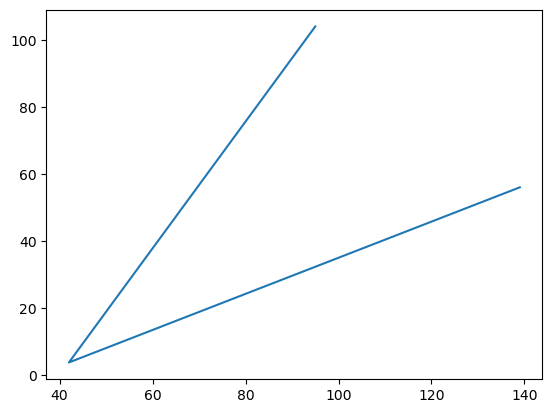

In [13]:
plt.plot([95,42,139],[104,3.73,56])

plt.show()

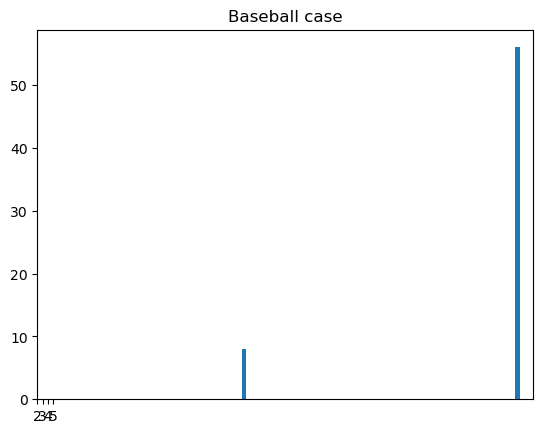

In [14]:
plt.bar([42,95],[8,56])
plt.xticks(np.arange(2,6))

plt.title('Baseball case')

plt.show()

# Univariate Analysis

<AxesSubplot:xlabel='R', ylabel='Density'>

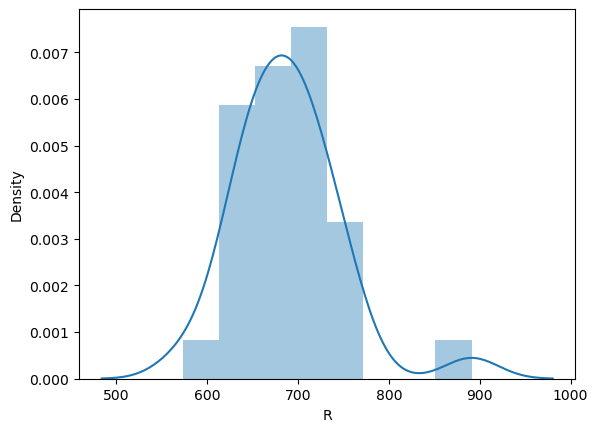

In [16]:
sns.distplot(data.R)

<AxesSubplot:xlabel='AB', ylabel='Density'>

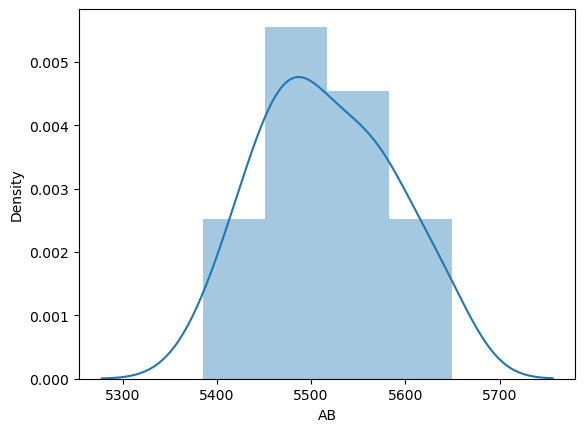

In [17]:
sns.distplot(data.AB)

<AxesSubplot:xlabel='H', ylabel='Density'>

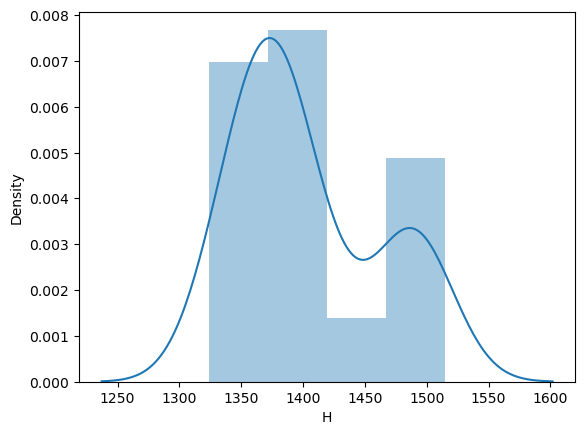

In [18]:
sns.distplot(data.H)

<AxesSubplot:xlabel='Double', ylabel='Density'>

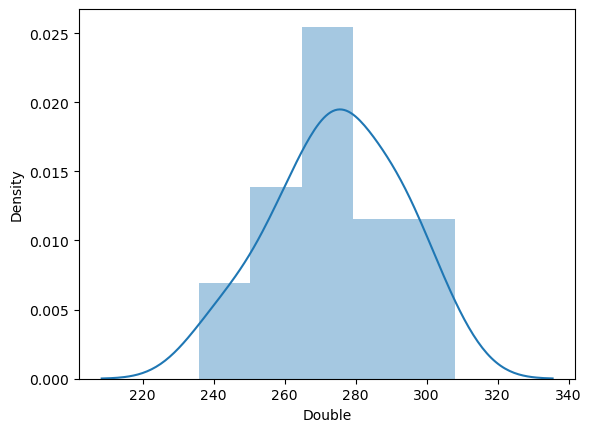

In [19]:
sns.distplot(data.Double)

<AxesSubplot:xlabel='Triple', ylabel='Density'>

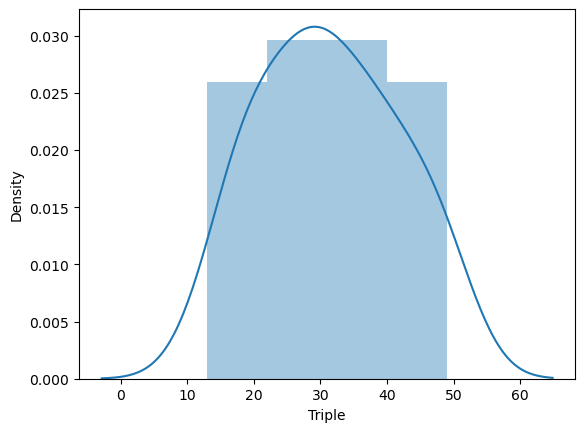

In [20]:
sns.distplot(data.Triple)

<AxesSubplot:xlabel='HR', ylabel='Density'>

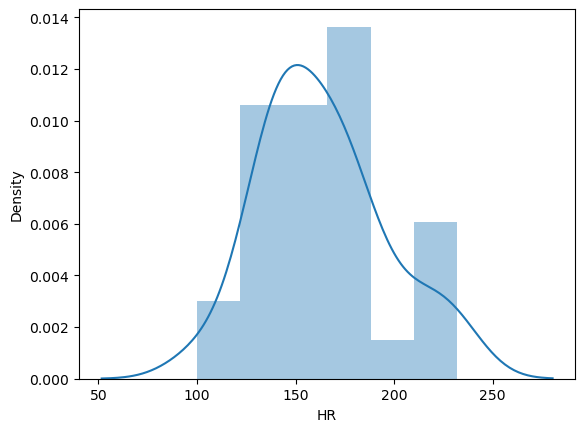

In [22]:
sns.distplot(data.HR)

<AxesSubplot:xlabel='BB', ylabel='Density'>

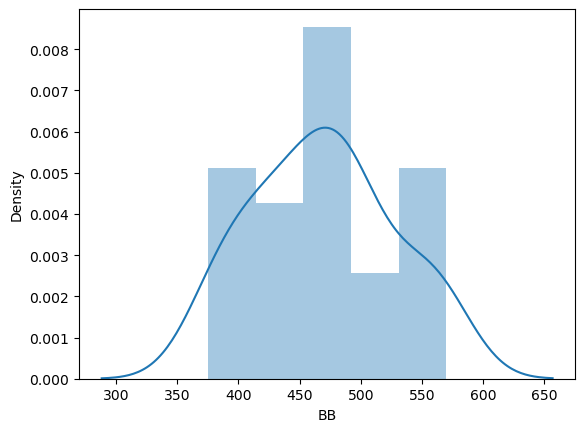

In [25]:
sns.distplot(data.BB)

<AxesSubplot:xlabel='SB', ylabel='Density'>

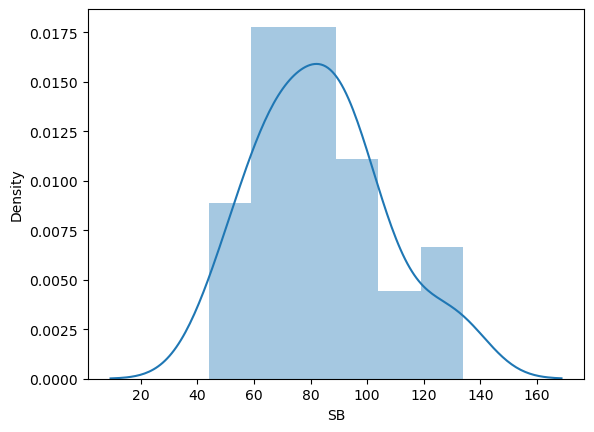

In [26]:
sns.distplot(data.SB)

<AxesSubplot:xlabel='ER', ylabel='Density'>

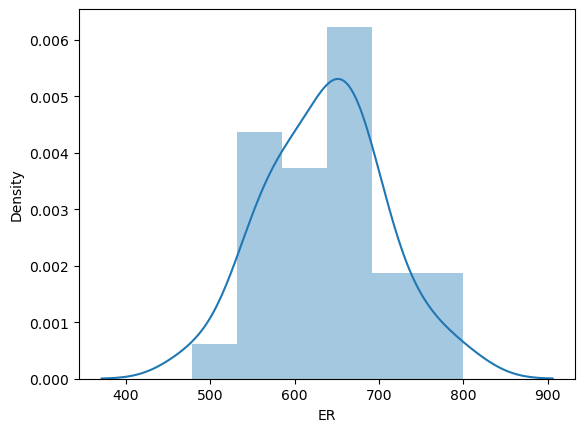

In [27]:
sns.distplot(data.ER)

<AxesSubplot:xlabel='ERA', ylabel='Density'>

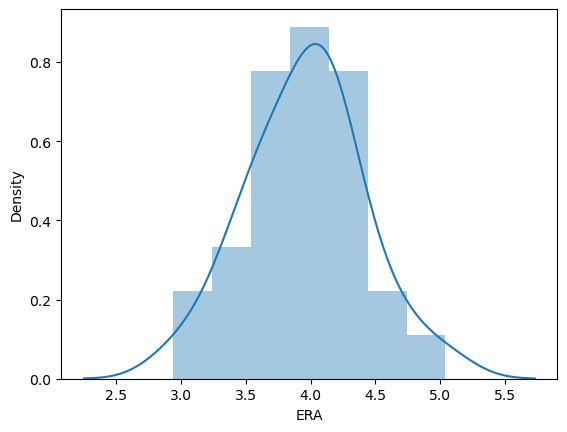

In [28]:
sns.distplot(data.ERA)

<AxesSubplot:xlabel='SHO', ylabel='Density'>

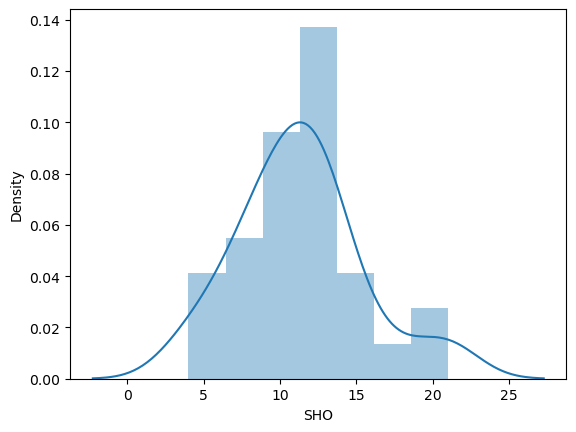

In [29]:
sns.distplot(data.SHO)

<AxesSubplot:xlabel='E', ylabel='Density'>

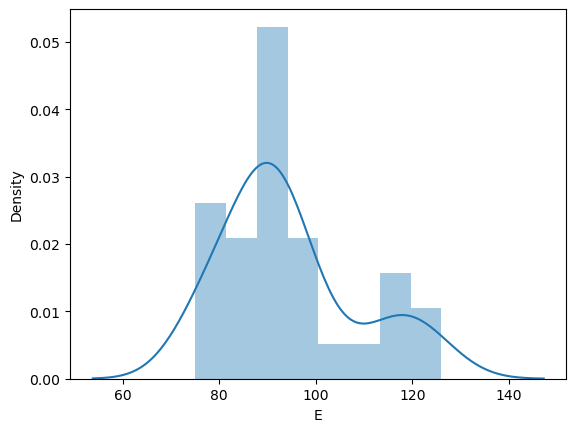

In [30]:
sns.distplot(data.E)

# Bivariate Analysis

<AxesSubplot:xlabel='R', ylabel='W'>

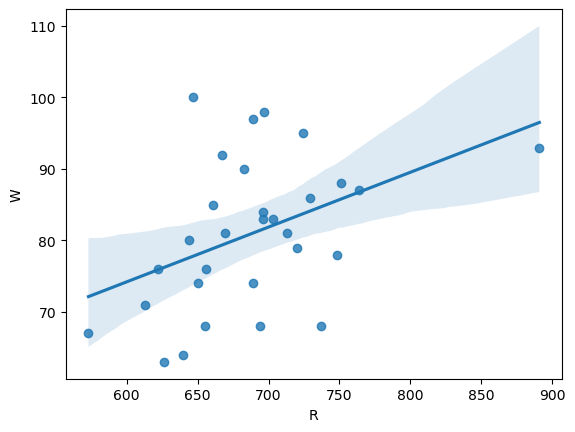

In [31]:
sns.regplot(x='R', y='W', data=data)

<AxesSubplot:xlabel='ER', ylabel='W'>

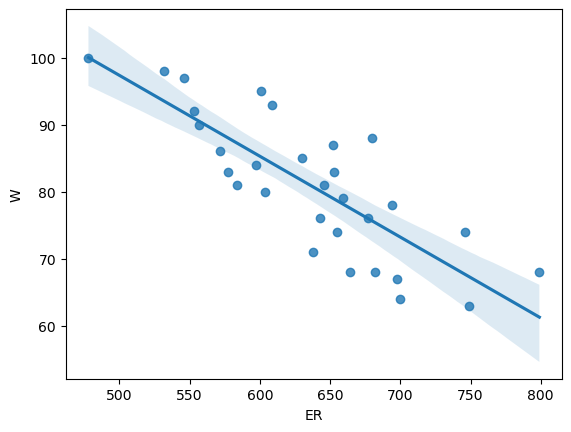

In [32]:
sns.regplot(x='ER', y='W', data=data)

In [33]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [34]:
lassCV LassoCV(alphas = None, max_iter = 100, normalize = True)
lasscv.fit(x_train, y_train)

SyntaxError: invalid syntax (603897540.py, line 1)

In [35]:
alpha = lasscv.alpha_

alpha

NameError: name 'lasscv' is not defined